In [1]:
!pip install -U kaleido

     |████████████████████████████████| 79.9 MB 46 kB/s s eta 0:00:01


In [2]:
import pandas as pd
import numpy as np
import random
from scipy.stats import kendalltau
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px




In [3]:
# read data and split data in meta data and rankings data

data = pd.read_csv('data/data_csv.csv', sep=',')
print('Shape data before preprocessing: ',data.shape)
meta = data.iloc[:,:14]
rankings = data.iloc[:,14:-1]
print('Meta shape: {}, ranking shape: {} '.format(meta.shape, rankings.shape))

Shape data before preprocessing:  (86, 155)
Meta shape: (86, 14), ranking shape: (86, 140) 


In [4]:
rankings.index

RangeIndex(start=0, stop=86, step=1)

In [5]:
rankings.iloc[69,:10]

Q4_1     NaN
Q4_2     NaN
Q4_3     NaN
Q4_4     NaN
Q4_5     NaN
Q4_6     NaN
Q4_7     NaN
Q4_8     NaN
Q4_9     NaN
Q4_10    NaN
Name: 69, dtype: object

In [6]:

def create_ranking_sets(rankings):
  # Creates sets of 10 columns for every ranking question.
    lst = list(range(131))
    lst = lst[0::10]

    ranking_sets = []
    for i in lst:

        # select columns
        rank_set = rankings.iloc[:, i:i+10]
        # drop empty rows
        # print(set.index)
        #print(set.iloc[69-2])
        rank_set = rank_set.dropna(axis=0)
        # print(set.index)
        # print(set.iloc[69])
        # add to list
        ranking_sets.append(rank_set)

    return ranking_sets

In [7]:
ranking_sets = create_ranking_sets(rankings)


# print(ranking_sets[0].index)
print(len(ranking_sets))

r_count = []
for set in ranking_sets:
    r_count.append(set.shape[0])
print(ranking_sets[0].shape)
print(ranking_sets[0].iloc[69])

14
(82, 10)
Q4_1      1
Q4_2      2
Q4_3      4
Q4_4      7
Q4_5      3
Q4_6     10
Q4_7      9
Q4_8      8
Q4_9      6
Q4_10     5
Name: 72, dtype: object


In [8]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
 

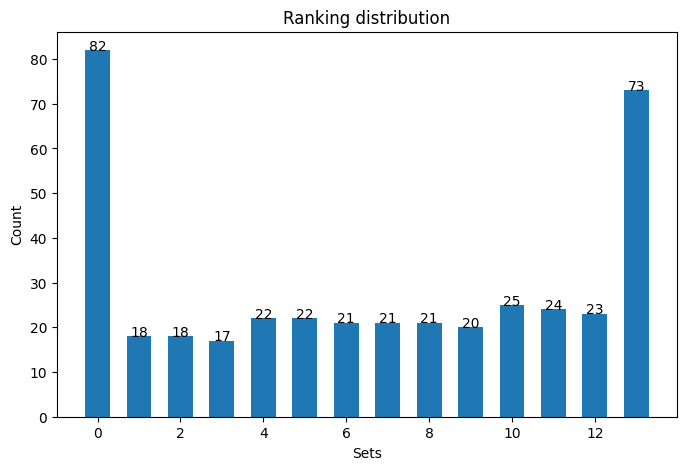

In [9]:
# Figure Size
plt.figure(figsize = (8, 5))
 
plt.bar(range(len(r_count)), r_count, width=0.6)

addlabels(range(len(r_count)), r_count)

# giving title to the plot
plt.title("Ranking distribution")
    
# giving X and Y labels
plt.xlabel("Sets")
plt.ylabel("Count")
    
# visualizing the plot
plt.savefig('Distribution_ranking_questions.pdf', bbox_inches='tight')
plt.show()

In [10]:
corr_matrix = ranking_sets[0].corr(method='kendall')

In [11]:
print(corr_matrix)

Empty DataFrame
Columns: []
Index: []


In [28]:
set0 = ranking_sets[0]
set0.head()

,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q4_9,Q4_10
0,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...
1,"{""ImportId"":""QID30_1""}","{""ImportId"":""QID30_2""}","{""ImportId"":""QID30_3""}","{""ImportId"":""QID30_4""}","{""ImportId"":""QID30_5""}","{""ImportId"":""QID30_6""}","{""ImportId"":""QID30_7""}","{""ImportId"":""QID30_8""}","{""ImportId"":""QID30_9""}","{""ImportId"":""QID30_10""}"
2,2,3,4,8,1,10,9,7,6,5
3,2,3,4,6,1,9,10,8,7,5
4,7,6,4,2,5,9,10,1,3,8


In [29]:
set0 = set0.drop(labels=0, axis=0)
set0 = set0.drop(labels=1, axis=0)

In [30]:
set0.head()

,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q4_9,Q4_10
2,2,3,4,8,1,10,9,7,6,5
3,2,3,4,6,1,9,10,8,7,5
4,7,6,4,2,5,9,10,1,3,8
5,4,6,3,5,2,8,10,9,7,1
6,2,3,5,4,1,10,9,8,6,7


In [31]:
set0 = set0.astype(int)
print(set0.shape)
# set0_q1 = set0.iloc[:,0]

# print(set0_q1.shape)


(80, 10)


In [32]:
def pairwise_kendall_tau(df):
    num_experts = df.shape[0] 
    correlation_matrix = np.zeros((num_experts, num_experts))

    for i in range(num_experts):
        for j in range(i, num_experts):
            correlation, _ = kendalltau(df.iloc[i,:  ], df.iloc[ j,: ])
            correlation_matrix[i, j] = correlation
            correlation_matrix[j, i] = correlation

    return pd.DataFrame(correlation_matrix)

In [33]:
df_tau = pairwise_kendall_tau(set0)
df_tau.head(10)

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,1.000000,0.866667,0.022222,0.511111,0.777778,0.822222,-0.066667,0.600000,0.911111,0.822222,...,0.866667,0.688889,0.511111,0.777778,-0.200000,0.688889,0.555556,0.733333,0.644444,0.822222
1,0.866667,1.000000,0.066667,0.644444,0.822222,0.777778,-0.022222,0.466667,0.955556,0.866667,...,0.911111,0.733333,0.466667,0.911111,-0.155556,0.644444,0.600000,0.777778,0.688889,0.777778
2,0.022222,0.066667,1.000000,-0.022222,0.155556,0.200000,0.111111,0.155556,0.022222,0.111111,...,0.066667,-0.200000,0.066667,0.155556,-0.288889,-0.111111,0.022222,0.200000,0.200000,-0.066667
3,0.511111,0.644444,-0.022222,1.000000,0.466667,0.511111,-0.022222,0.111111,0.600000,0.600000,...,0.555556,0.555556,0.377778,0.555556,-0.155556,0.377778,0.244444,0.422222,0.511111,0.688889
4,0.777778,0.822222,0.155556,0.466667,1.000000,0.600000,-0.111111,0.466667,0.777778,0.777778,...,0.822222,0.644444,0.555556,0.911111,-0.155556,0.644444,0.688889,0.777778,0.511111,0.688889
5,0.822222,0.777778,0.200000,0.511111,0.600000,1.000000,0.111111,0.511111,0.822222,0.822222,...,0.777778,0.511111,0.333333,0.688889,-0.288889,0.511111,0.466667,0.733333,0.733333,0.644444
6,-0.066667,-0.022222,0.111111,-0.022222,-0.111111,0.111111,1.000000,-0.111111,-0.066667,0.022222,...,-0.111111,-0.022222,-0.466667,-0.111111,-0.466667,-0.288889,-0.155556,0.022222,0.022222,-0.066667
7,0.600000,0.466667,0.155556,0.111111,0.466667,0.511111,-0.111111,1.000000,0.511111,0.511111,...,0.555556,0.288889,0.377778,0.466667,-0.155556,0.555556,0.333333,0.511111,0.422222,0.422222
8,0.911111,0.955556,0.022222,0.600000,0.777778,0.822222,-0.066667,0.511111,1.000000,0.822222,...,0.955556,0.688889,0.511111,0.866667,-0.111111,0.688889,0.555556,0.733333,0.644444,0.822222
9,0.822222,0.866667,0.111111,0.600000,0.777778,0.822222,0.022222,0.511111,0.822222,1.000000,...,0.777778,0.688889,0.422222,0.777778,-0.288889,0.600000,0.555556,0.822222,0.644444,0.733333


In [34]:
mean = df_tau.mean(axis=0)
std = df_tau.std()
mean_mean = mean.mean()
std_mean = mean.std()
print('mean:',mean.mean())
print('std:',std_mean)

threshold = mean_mean - std_mean*2
print(threshold)

# threshold = mean - std*2

# print(-0.5<threshold)


mean: 0.511041666666667
std: 0.1828484696719791
0.14534472732270876


In [35]:
set0.mean()

Q4_1     2.4500
Q4_2     3.7000
Q4_3     4.1750
Q4_4     6.0875
Q4_5     2.0125
Q4_6     8.6625
Q4_7     8.6250
Q4_8     7.6375
Q4_9     6.4750
Q4_10    5.1750
dtype: float64

In [45]:
import plotly.graph_objects as go
fig = go.Figure()
fig = px.scatter(range(set0.shape[0]),mean)
fig.add_vline(x=0.2)
fig.update_traces(marker=dict(size=14,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(
    # marker=dict(size=12),
    xaxis_title=dict(text="Tau", font=dict(size=25)),
    yaxis_title=dict(text="Ranker index", font=dict(size=25)), 
    title= dict(text="Average agreement Tau per ranker", font=dict(size=25))
)
fig.write_image("outliers_q1.pdf", width=1500, height=700)
fig.show()

In [145]:
# ex74 = set0.iloc[74,:]
# ex45= set0.iloc[6,:]

# print(ex74)
# print(ex45)
len(ranking_sets)
ranking_sets = ranking_sets[:-1]

In [115]:
mean[mean<threshold]

2     0.042778
6    -0.053889
25    0.001667
46   -0.072778
56    0.102778
69    0.023889
74   -0.096111
dtype: float64

In [14]:
def get_outliers(ranking_sets):
    outliers_dict = {}
    lst =[]
    for i,set in enumerate(ranking_sets):
        set = set.drop(labels=0, axis=0)
        set = set.drop(labels=1, axis=0) 
        set = set.astype(int)

        df_tau = pairwise_kendall_tau(set)
        mean = df_tau.mean(axis=0)
        mean_mean = mean.mean()
        std_mean = mean.std()

        threshold = mean_mean - std_mean*2
        filtered = mean[mean<threshold]
        filtered  = filtered[filtered<0.2]
        if len(filtered)>0:
            outliers_dict[i] = filtered.index.values
        #lst.append(mean[mean<threshold])

    return outliers_dict

In [24]:
lst = get_outliers(ranking_sets=ranking_sets)
lst


{0: array([ 2,  6, 25, 46, 56, 69, 74]),
 5: array([10]),
 6: array([9]),
 7: array([ 6, 11]),
 8: array([ 6, 11]),
 10: array([12, 17]),
 11: array([0]),
 13: array([ 2, 32])}

In [40]:
# ranking_sets[0].index[69]
print(ranking_sets[11].iloc[0])
# print(ranking_sets[].iloc[74])
# rank_drop = ranking_sets[0].drop(ranking_sets[0].index[[69,74]],axis=0)

# print(rank_drop.iloc[69])
# print(rank_drop.iloc[74])
# print(ranking_sets[0].index[69])

Q6_1.3     Drag the explanations in order such that the f...
Q6_2.3     Drag the explanations in order such that the f...
Q6_3.3     Drag the explanations in order such that the f...
Q6_4.3     Drag the explanations in order such that the f...
Q6_5.3     Drag the explanations in order such that the f...
Q6_6.3     Drag the explanations in order such that the f...
Q6_7.3     Drag the explanations in order such that the f...
Q6_8.3     Drag the explanations in order such that the f...
Q6_9.3     Drag the explanations in order such that the f...
Q6_10.3    Drag the explanations in order such that the f...
Name: 0, dtype: object


In [31]:
import csv
import pickle
with open('outliers.pkl', 'wb') as fp:
    pickle.dump(lst, fp)
    print('dictionary saved successfully to file')

# # open file for writing, "w" is writing
# w = csv.writer(open("outliers.csv", "w"))

# # loop over dictionary keys and values
# for key, val in lst.items():

#     # write every key and value to file
#     w.writerow([key, val])

with open('outliers.pkl', 'rb') as fp:
    outliers = pickle.load(fp)
    print('outliers dictionary')
    print(outliers)

i = 13

x = outliers.get(i)
result = {key: values for key, values in outliers.items() if i in outliers}
z = result.get(i)
x

dictionary saved successfully to file
outliers dictionary
{0: array([ 2,  6, 25, 46, 56, 69, 74]), 5: array([10]), 6: array([9]), 7: array([ 6, 11]), 8: array([ 6, 11]), 10: array([12, 17]), 11: array([0]), 13: array([ 2, 32])}


array([ 2, 32])

In [36]:
outlier_lst = outliers.get(11)
print(outlier_lst)

[0]


In [39]:
for i, set in enumerate(ranking_sets):
        #print(i)
        # if i>0:
        #     break
        # insert outlier removal function here
        if i ==11:
            print(set.index)
        outlier_lst = outliers.get(i)
        # print(outlier_lst)
        if outlier_lst is not None:
            set = set.drop(set.index[[outlier_lst]], axis=0)
        # set = set.drop(labels=74, axis=0)
        if i ==11:
            print(set.index)

Int64Index([ 0,  1,  3,  4,  5,  6,  8, 12, 15, 18, 20, 27, 30, 34, 36, 43, 44,
            46, 49, 57, 62, 68, 71, 76],
           dtype='int64')
Int64Index([ 1,  3,  4,  5,  6,  8, 12, 15, 18, 20, 27, 30, 34, 36, 43, 44, 46,
            49, 57, 62, 68, 71, 76],
           dtype='int64')


In [64]:
mean < threshold

0     False
1     False
2      True
3     False
4     False
      ...  
75    False
76    False
77    False
78    False
79    False
Length: 80, dtype: bool

## Consistency

In [76]:
rankings.head()

,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q4_9,Q4_10,...,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10
0,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...,Drag the explanations in order such that the f...
1,"{""ImportId"":""QID30_1""}","{""ImportId"":""QID30_2""}","{""ImportId"":""QID30_3""}","{""ImportId"":""QID30_4""}","{""ImportId"":""QID30_5""}","{""ImportId"":""QID30_6""}","{""ImportId"":""QID30_7""}","{""ImportId"":""QID30_8""}","{""ImportId"":""QID30_9""}","{""ImportId"":""QID30_10""}",...,"{""ImportId"":""QID31_1""}","{""ImportId"":""QID31_2""}","{""ImportId"":""QID31_3""}","{""ImportId"":""QID31_4""}","{""ImportId"":""QID31_5""}","{""ImportId"":""QID31_6""}","{""ImportId"":""QID31_7""}","{""ImportId"":""QID31_8""}","{""ImportId"":""QID31_9""}","{""ImportId"":""QID31_10""}"
2,2,3,4,8,1,10,9,7,6,5,...,2,3,4,6,1,9,10,8,7,5
3,2,3,4,6,1,9,10,8,7,5,...,1,4,7,5,2,9,10,6,8,3
4,7,6,4,2,5,9,10,1,3,8,...,7,10,6,3,9,2,5,1,4,8


In [82]:

# rankings = rankings.drop(labels=0, axis=0)
# rankings = rankings.drop(labels=1, axis=0)
rankings.head()


,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q4_9,Q4_10,...,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10
2,2,3,4,8,1,10,9,7,6,5,...,2,3,4,6,1,9,10,8,7,5
3,2,3,4,6,1,9,10,8,7,5,...,1,4,7,5,2,9,10,6,8,3
4,7,6,4,2,5,9,10,1,3,8,...,7,10,6,3,9,2,5,1,4,8
5,4,6,3,5,2,8,10,9,7,1,...,2,3,6,7,1,10,8,9,4,5
6,2,3,5,4,1,10,9,8,6,7,...,2,4,5,3,1,10,9,8,7,6


In [85]:
consistency_set = pd.concat([rankings.iloc[:, :10], rankings.iloc[:, -10:]], axis=1)
# first_set_cons = rankings.iloc[:,0:10]
# last_set_cons = rankings.iloc[:,0:10]
consistency_set.head() 
print("shape", consistency_set.shape)

shape (84, 20)


In [100]:
consistency_set = consistency_set.dropna()
print("shape", consistency_set.shape)

taus = np.zeros(consistency_set.shape[0])
for i in range(consistency_set.shape[0]):
    first = consistency_set.iloc[i,:10]
    second = consistency_set.iloc[i,-10:]
    tau, _ = kendalltau(first, second)
    taus[i] = tau

np.savetxt(fname='consistency.csv', X=taus, delimiter=',')
print(taus.mean())
print(taus.max())
print(taus.min())
print(taus.argmin())

print(consistency_set.iloc[28,:])

shape (69, 20)
0.3256038647342994
0.9999999999999999
-0.37777777777777777
28
Q4_1      2
Q4_2      4
Q4_3      3
Q4_4      5
Q4_5      1
Q4_6     10
Q4_7      7
Q4_8      9
Q4_9      8
Q4_10     6
Q8_1      2
Q8_2      7
Q8_3      3
Q8_4      6
Q8_5      8
Q8_6      9
Q8_7      5
Q8_8      4
Q8_9     10
Q8_10     1
Name: 32, dtype: object
